In [1]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import matplotlib.pyplot as plt
#please remeber to git push and git pull before and after working

In [2]:
#longer run time. try to avoid running a lot
full_data = nfl.import_pbp_data([2021], downcast=True, cache=False, alt_path=None)

2021 done.
Downcasting floats.


In [3]:
full_data

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0.0,0.0
1,40.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,None,None,NaN,None,NaN,43616;43680;52416;49410;53634;43556;53639;4625...,00-0032560;00-0036356;00-0035705;00-0036896;00...,00-0032496;00-0036652;00-0032355;00-0033455;00...,11.0,11.0
2,55.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,52416;49410;38629;53445;43334;47816;47848;3853...,00-0029413;00-0032764;00-0029701;00-0027648;00...,00-0036356;00-0035705;00-0036933;00-0035236;00...,11.0,11.0
3,76.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",4.0,52416;49410;38629;53445;43334;47816;47848;3853...,00-0029413;00-0032764;00-0029701;00-0027648;00...,00-0036356;00-0035705;00-0036933;00-0035236;00...,11.0,11.0
4,100.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"2 DL, 4 LB, 5 DB",4.0,52416;42401;49410;43556;38629;40008;47816;4784...,00-0032355;00-0029413;00-0029701;00-0033455;00...,00-0036356;00-0032127;00-0035705;00-0030528;00...,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50707,3930.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,LA,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",NaN,43298;47844;42500;43045;32230;52588;47917;4334...,,,0.0,0.0
50708,3951.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,None,None,None,...,None,None,NaN,None,NaN,,,,0.0,0.0
50709,3968.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,LA,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",3.0,43298;42500;47844;43045;32230;52588;47917;4334...,,,0.0,0.0
50710,3990.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,LA,away,CIN,...,None,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",NaN,52544;42400;46146;43299;46180;44872;46633;4612...,,,0.0,0.0


In [4]:
#full data = full_data.drop(columns=['offense_formation', 'offense_personnel', 'players_on_play', 'defense_players', 'offense_players'])

In [5]:
pd.set_option('display.max_columns', None)
#full_data = full_data[['game_id']]
full_data

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [6]:
newData = full_data[['game_date', 'play_id', 'play_type_nfl', 'game_id', 'possession_team', 'home_team', 'away_team', 'total_home_score', 'total_away_score', 'home_score', 'away_score', 'wp', 'game_half', 'game_seconds_remaining', 'play_type', 'def_wp', 'punt_blocked', 'third_down_converted', 'third_down_failed', 'fourth_down_converted', 'fourth_down_failed', 'interception', 'punt_inside_twenty', 'kickoff_inside_twenty', 'kickoff_out_of_bounds', 'fumble_forced', 'fumble_not_forced', 'fumble_lost', 'fumble', 'safety', 'field_goal_result', 'own_kickoff_recovery_td', 'qb_hit', 'sack', 'touchdown', 'pass_touchdown', 'rush_touchdown', 'return_touchdown', 'drive_ended_with_score']]
newData = newData.rename(columns={"wp": "win_percentage", "def_wp": "defense_win_percentage"})
newData

,game_date,play_id,play_type_nfl,game_id,possession_team,home_team,away_team,total_home_score,total_away_score,home_score,away_score,win_percentage,game_half,game_seconds_remaining,play_type,defense_win_percentage,punt_blocked,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,interception,punt_inside_twenty,kickoff_inside_twenty,kickoff_out_of_bounds,fumble_forced,fumble_not_forced,fumble_lost,fumble,safety,field_goal_result,own_kickoff_recovery_td,qb_hit,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,drive_ended_with_score
0,2021-09-12,1.0,GAME_START,2021_01_ARI_TEN,,TEN,ARI,0.0,0.0,13,38,0.546262,Half1,3600.0,None,0.453738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-12,40.0,KICK_OFF,2021_01_ARI_TEN,ARI,TEN,ARI,0.0,0.0,13,38,0.546262,Half1,3600.0,kickoff,0.453738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-12,55.0,RUSH,2021_01_ARI_TEN,TEN,TEN,ARI,0.0,0.0,13,38,0.546262,Half1,3600.0,run,0.453738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-09-12,76.0,PASS,2021_01_ARI_TEN,TEN,TEN,ARI,0.0,0.0,13,38,0.520599,Half1,3563.0,pass,0.479401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-09-12,100.0,PASS,2021_01_ARI_TEN,TEN,TEN,ARI,0.0,0.0,13,38,0.498319,Half1,3522.0,pass,0.501681,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50707,2022-02-13,3930.0,RUSH,2021_22_LA_CIN,CIN,CIN,LA,20.0,23.0,20,23,0.331002,Half2,48.0,run,0.668998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50708,2022-02-13,3951.0,TIMEOUT,2021_22_LA_CIN,,CIN,LA,20.0,23.0,20,23,0.212148,Half2,43.0,no_play,0.787852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50709,2022-02-13,3968.0,PASS,2021_22_LA_CIN,CIN,CIN,LA,20.0,23.0,20,23,0.212148,Half2,43.0,pass,0.787852,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50710,2022-02-13,3990.0,RUSH,2021_22_LA_CIN,LA,CIN,LA,20.0,23.0,20,23,0.958877,Half2,39.0,qb_kneel,0.041123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
newData = newData[newData['game_id'] == '2021_01_CLE_KC']
pd.set_option('display.max_rows', None)
newData

,game_date,play_id,play_type_nfl,game_id,possession_team,home_team,away_team,total_home_score,total_away_score,home_score,away_score,win_percentage,game_half,game_seconds_remaining,play_type,defense_win_percentage,punt_blocked,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,interception,punt_inside_twenty,kickoff_inside_twenty,kickoff_out_of_bounds,fumble_forced,fumble_not_forced,fumble_lost,fumble,safety,field_goal_result,own_kickoff_recovery_td,qb_hit,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,drive_ended_with_score
550,2021-09-12,1.0,GAME_START,2021_01_CLE_KC,,KC,CLE,0.0,0.0,33,29,0.433208,Half1,3600.0,None,0.566792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,2021-09-12,40.0,KICK_OFF,2021_01_CLE_KC,KC,KC,CLE,0.0,0.0,33,29,0.433208,Half1,3600.0,kickoff,0.566792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
552,2021-09-12,55.0,RUSH,2021_01_CLE_KC,CLE,KC,CLE,0.0,0.0,33,29,0.433208,Half1,3600.0,run,0.566792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
553,2021-09-12,76.0,PASS,2021_01_CLE_KC,CLE,KC,CLE,0.0,0.0,33,29,0.415296,Half1,3558.0,pass,0.584704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
554,2021-09-12,100.0,RUSH,2021_01_CLE_KC,CLE,KC,CLE,0.0,0.0,33,29,0.448653,Half1,3527.0,run,0.551347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
555,2021-09-12,126.0,PASS,2021_01_CLE_KC,CLE,KC,CLE,0.0,0.0,33,29,0.446921,Half1,3492.0,pass,0.553079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
556,2021-09-12,155.0,PASS,2021_01_CLE_KC,CLE,KC,CLE,0.0,0.0,33,29,0.480118,Half1,3445.0,pass,0.519882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
557,2021-09-12,177.0,RUSH,2021_01_CLE_KC,CLE,KC,CLE,0.0,0.0,33,29,0.461847,Half1,3440.0,run,0.538153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
558,2021-09-12,198.0,PASS,2021_01_CLE_KC,CLE,KC,CLE,0.0,0.0,33,29,0.496458,Half1,3395.0,pass,0.503542,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
559,2021-09-12,222.0,RUSH,2021_01_CLE_KC,CLE,KC,CLE,0.0,0.0,33,29,0.560728,Half1,3354.0,run,0.439272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
newData['avg_win'] = np.where(newData.possession_team == 'KC', newData.win_percentage, newData.defense_win_percentage)

#(newData.win_percentage if newData.possession_team == 'KC' else newData.defense_win_percentage)

/var/folders/sh/76qykz0s52197rl0jgm65tp160wtzt/T/ipykernel_75271/1806617328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['avg_win'] = np.where(newData.possession_team == 'KC', newData.win_percentage, newData.defense_win_percentage)


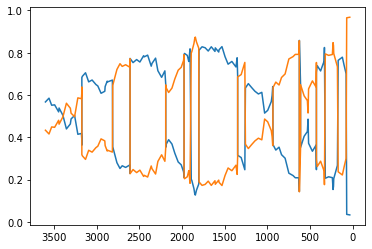

In [9]:
#plt.plot(newData.game_seconds_remaining, newData.win_percentage)
plt.plot(newData.game_seconds_remaining, newData.defense_win_percentage)
plt.plot(newData.game_seconds_remaining, newData.win_percentage)
plt.gca().invert_xaxis()
#plt.invert_xaxis()